In [1]:
import numpy as np
import pandas as pd
from sklearn import *
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


reading a csv file from drive using **.read_csv()** function available in pandas library
 

In [3]:
data=pd.read_csv("/content/drive/MyDrive/titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


since Name column has no use within our prediction so we have to remove it using **.drop('column_name_to_drop',axis=1)** here axis is used to specify that  we are dropping an column rather than row

In [4]:

data=data.drop(['Name','Ticket','Cabin'],axis=1)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


Since, **Survived** column is more important as an feature since we know for better visualisation we need strings, So I changed the descrete values **[1,0] to [yes , no]** using **.replace()** function available in pandas library **inplace=True** represents that the given value is to replaced in place of the mentioned value 

In [5]:
# data['Sex'].replace('male',value=1,inplace=True)
# data['Sex'].replace('female',0,inplace=True)

# data.head()


In [6]:
data['Survived'].replace(1,value='yes',inplace=True)
data['Survived'].replace(0,'no',inplace=True)

data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,no,3,male,22.0,1,0,7.2500,S
1,2,yes,1,female,38.0,1,0,71.2833,C
2,3,yes,3,female,26.0,0,0,7.9250,S
3,4,yes,1,female,35.0,1,0,53.1000,S
4,5,no,3,male,35.0,0,0,8.0500,S


to check is there any null values in dataset we use **dataset.isna()** is used here this method returns whether the value is null or not

In [7]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

to drop null valued rows we use **.dropna()** to drop those null values

In [8]:
data=data.dropna()

to check the shape of the dataset we can use **.shape** method

In [9]:
data.shape

(712, 9)

**.describe()** function is used to check the **mean,median,min,max,deviation** of the dataset



In [10]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [11]:
survived=data.groupby('Survived')


I used **.countplot()** to see whether how many people are dead and alive on basis if **Survived** column


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

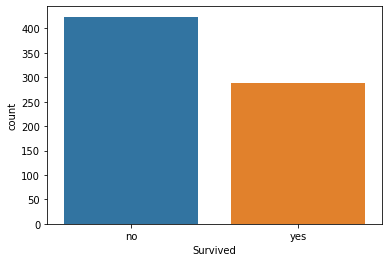

In [12]:
sns.countplot('Survived',data=data)

In [13]:
grouped_survived=data.groupby(['Sex', 'Survived'])['Survived'].count()
grouped_survived


Sex     Survived
female  no           64
        yes         195
male    no          360
        yes          93
Name: Survived, dtype: int64

In [14]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,no,3,male,22.0,1,0,7.2500,S
1,2,yes,1,female,38.0,1,0,71.2833,C
2,3,yes,3,female,26.0,0,0,7.9250,S
3,4,yes,1,female,35.0,1,0,53.1000,S
4,5,no,3,male,35.0,0,0,8.0500,S


<AxesSubplot:xlabel='Sex', ylabel='count'>

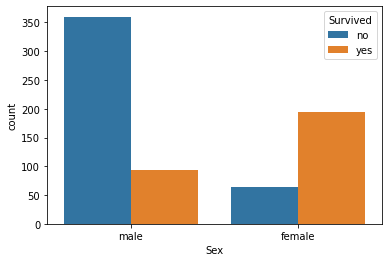

In [15]:
sns.countplot(x='Sex',hue='Survived',data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

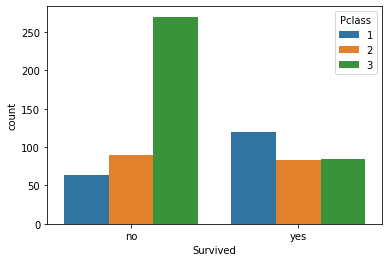

In [16]:
sns.countplot(x='Survived',hue='Pclass',data=data)

**below two blocks is to check the youngest and oldest persons details who is survived**

In [44]:
print("oldest person alive is :")
val=max(survived['Age'])
k=0
for i in data['Age']:
  if val==i: 
    index=k
    break
  k+=1
print(data[index:index+1])

oldest person alive is :
     PassengerId Survived  Pclass   Sex   Age  SibSp  Parch  Fare Embarked
630          631      yes       1  male  80.0      0      0  30.0        S


In [48]:
print("youngest person alive is :")
val=min(survived['Age'])
# print(val)
index=0
k=0
for i in data['Age']:
  if val==i: 
    index=k
    break
  k+=1
print(data[index:index+1])

youngest person alive is :
   PassengerId Survived  Pclass   Sex   Age  SibSp  Parch  Fare Embarked
0            1       no       3  male  22.0      1      0  7.25        S


<AxesSubplot:xlabel='Age', ylabel='Count'>

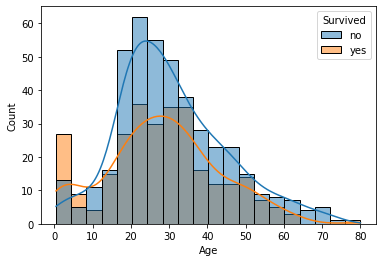

In [57]:
sns.histplot(x='Age',hue='Survived',data=data,kde=True)

<AxesSubplot:xlabel='Survived', ylabel='count'>

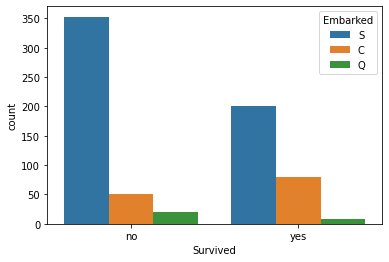

In [58]:
sns.countplot(x='Survived',hue='Embarked',data=data)